6.4: Plot the degree distribution of this network. Start from a plain degree distribution, then in log-log scale, finally plot the complement of the cumulative distribution.

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
G = nx.read_edgelist("6_4_data.txt")

196591


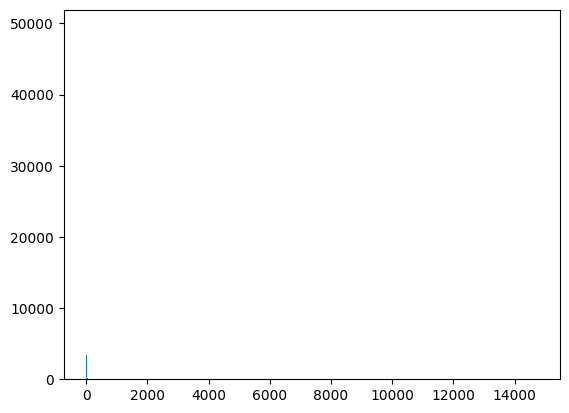

In [35]:
#1
degs = G.degree(G.nodes())
max_degree = max(degs, key=lambda x: x[1])[1]
nodes_per_degree = [0]*(max_degree+1)
for (n, d) in degs:
    nodes_per_degree[d] += 1
print(sum(nodes_per_degree))

plt.hist(range(max_degree+1), bins=max_degree+1, weights=nodes_per_degree)
plt.show()

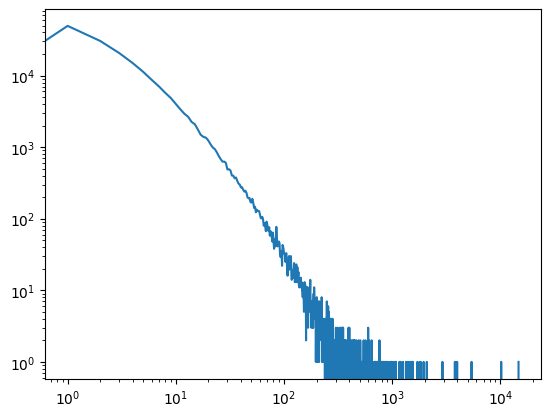

In [27]:
#2
plt.loglog(range(max_degree+1), nodes_per_degree)
plt.show()

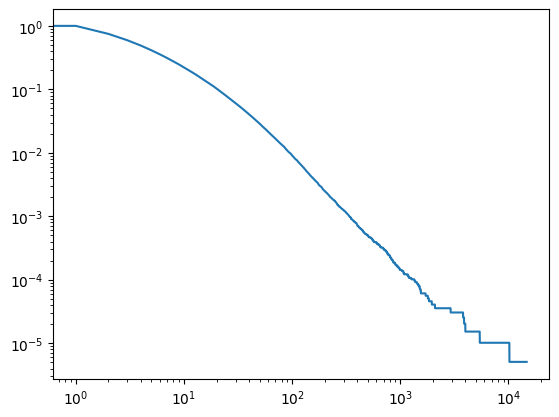

In [40]:
#3 
N = G.number_of_nodes()
cum_nodes_per_degree = [sum(nodes_per_degree[i:])/N for i in range(max_degree+1)]
plt.loglog(range(max_degree+1), cum_nodes_per_degree)
plt.show()

6.5 Estimate the power law exponent of the CCDF degree distribution from Exercise 6.4. First by a linear regression on the log-log plane, then by using the powerlaw package. Do they agree? Is this a shifted power law? If so, what's k min? (Hint: powerlaw can calculate this for you)

In [63]:
x = np.array(list(range(max_degree+1)))
y = np.array(cum_nodes_per_degree)
log_x = np.where(x != 0, np.log(x), 0)
log_y = np.where(y != 0, np.log(y), 0)

import statsmodels.formula.api as smf 
model = smf.ols(formula='log_y ~ log_x', data={'log_x': log_x, 'log_y': log_y}).fit()
print(model.summary())

import powerlaw
dags = np.array([d for (n, d) in degs])+1
fit = powerlaw.Fit(dags)
print(fit.power_law.alpha)
print(fit.power_law.xmin)

C:\Users\thore\AppData\Local\Temp\ipykernel_5844\1735686163.py:3: RuntimeWarning: divide by zero encountered in log
  log_x = np.where(x != 0, np.log(x), 0)


                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 4.995e+05
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:33:18   Log-Likelihood:                 251.64
No. Observations:               14731   AIC:                            -499.3
Df Residuals:                   14729   BIC:                            -484.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8241      0.017     48.607      0.0

Find a way to fit the truncated power law of this network. Hint: use the scipy.optimize.curve_fit to fit an arbitrary function and use the functional form I provide in Chapter 6 of the book.